In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data=pd.read_csv("loan log reg.csv")

## ETL 

- Extract
- Transform
- Load

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [4]:
data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [5]:
data.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

### Transform

In [6]:
data["Date.of.Birth"]=pd.to_datetime(data["Date.of.Birth"])

In [7]:
data["DisbursalDate"]=pd.to_datetime(data["DisbursalDate"])

In [8]:
data["Date.of.Birth"].dt.year

0         1984
1         1985
2         1985
3         1993
4         1977
          ... 
233149    1988
233150    1988
233151    1976
233152    1994
233153    1984
Name: Date.of.Birth, Length: 233154, dtype: int64

In [9]:
pd.to_datetime("now")

Timestamp('2021-06-02 20:55:55.145074')

Converting date into age

In [10]:
data["age"]=(pd.to_datetime("now")-data["Date.of.Birth"]).astype("<m8[Y]")

In [11]:
data["age"]

0         37.0
1         35.0
2         35.0
3         27.0
4         43.0
          ... 
233149    33.0
233150    33.0
233151    45.0
233152    27.0
233153    37.0
Name: age, Length: 233154, dtype: float64

In [12]:
data["CREDIT.HISTORY.LENGTH"][0].split(" ")[0][:-3]

'0'

In [13]:
def str_int(data):
    yy,mm=data.split(" ")
    return 12*(int(yy[:-3]))+int(mm[:-3])

In [14]:
data["CREDIT.HISTORY.LENGTH"].apply(str_int)

0          0
1         23
2          0
3         15
4          0
          ..
233149    39
233150     6
233151     0
233152     0
233153     0
Name: CREDIT.HISTORY.LENGTH, Length: 233154, dtype: int64

In [15]:
data["credit.history.length"]=data["CREDIT.HISTORY.LENGTH"].apply(str_int)


In [16]:
data["Avg.acc.age"]=data["AVERAGE.ACCT.AGE"].apply(str_int)

In [17]:
data["Employment.Type"]=(data["Employment.Type"].fillna(data["Employment.Type"].mode()[0]))

In [18]:
data.isnull().sum()

UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
Date.of.Birth                          0
Employment.Type                        0
DisbursalDate                          0
State_ID                               0
Employee_code_ID                       0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALA

In [19]:
data["MobileNo_Avl_Flag"]

0         1
1         1
2         1
3         1
4         1
         ..
233149    1
233150    1
233151    1
233152    1
233153    1
Name: MobileNo_Avl_Flag, Length: 233154, dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 44 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   UniqueID                             233154 non-null  int64         
 1   disbursed_amount                     233154 non-null  int64         
 2   asset_cost                           233154 non-null  int64         
 3   ltv                                  233154 non-null  float64       
 4   branch_id                            233154 non-null  int64         
 5   supplier_id                          233154 non-null  int64         
 6   manufacturer_id                      233154 non-null  int64         
 7   Current_pincode_ID                   233154 non-null  int64         
 8   Date.of.Birth                        233154 non-null  datetime64[ns]
 9   Employment.Type                      233154 non-null  object        
 

In [21]:
data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,age,credit.history.length,Avg.acc.age
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,...,0,0,0,0yrs 0mon,0yrs 0mon,0,0,37.0,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,Self employed,...,0,0,1,1yrs 11mon,1yrs 11mon,0,1,35.0,23,23
2,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,...,0,0,0,0yrs 0mon,0yrs 0mon,0,0,35.0,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,1993-12-30,Self employed,...,0,0,0,0yrs 8mon,1yrs 3mon,1,1,27.0,15,8
4,539055,52378,60300,88.39,67,22807,45,1495,1977-09-12,Self employed,...,0,0,0,0yrs 0mon,0yrs 0mon,1,1,43.0,0,0


In [22]:
data.isnull().sum()

UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
Date.of.Birth                          0
Employment.Type                        0
DisbursalDate                          0
State_ID                               0
Employee_code_ID                       0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALA

There are 7661 missing values for "Employment.Type"

## OUTLIER ANALYSIS

In [23]:
numdf=data.select_dtypes(exclude=object)

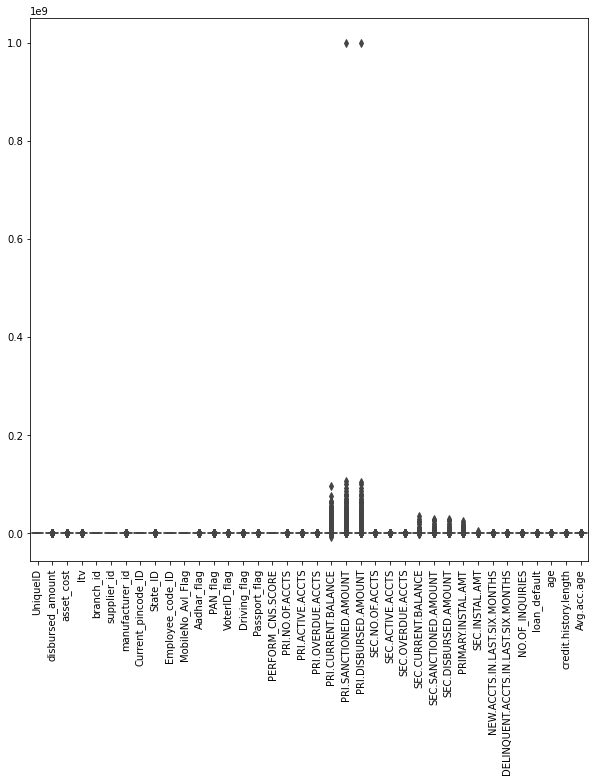

In [67]:
sns.boxplot(data=numdf.drop(["Date.of.Birth","DisbursalDate"],axis=1))
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = [15,15]

The below listed columns proved to have outliers:
- 'PRI.CURRENT.BALANCE'
- 'PRI.SANCTIONED.AMOUNT'
- 'PRI.DISBURSED.AMOUNT'
- 'SEC.CURRENT.BALANCE'
- 'SEC.SANCTIONED.AMOUNT',
- 'SEC.DISBURSED.AMOUNT'
- 'PRIMARY.INSTAL.AMT'

In [25]:
outlier_cols=['PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT','PRI.DISBURSED.AMOUNT','SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT']

In [26]:
outlier_df=numdf[outlier_cols]
outlier_df

,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT
0,0,0,0,0,0,0,0
1,27600,50200,50200,0,0,0,1991
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,31
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
233149,390443,416133,416133,0,0,0,4084
233150,0,0,0,0,0,0,1565
233151,0,0,0,0,0,0,0
233152,0,0,0,0,0,0,0


In [27]:
outlier_df.describe()

,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT
count,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05
mean,1.659001e+05,2.185039e+05,2.180659e+05,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04
std,9.422736e+05,2.374794e+06,2.377744e+06,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05
min,-6.678296e+06,0.000000e+00,0.000000e+00,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.500650e+04,6.250000e+04,6.080000e+04,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03
max,9.652492e+07,1.000000e+09,1.000000e+09,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07


Our Assumption was right there is a significant difference between the minimum and maximum values for the columns that showed outliers in the boxplot.

## EXPLORATORY DATA ANALYSIS
- Do it and understand how each variable is impacting the outcome and what is the significance.

In [28]:
numdf=data.select_dtypes(exclude=object)
catdf=data.select_dtypes(include=object)

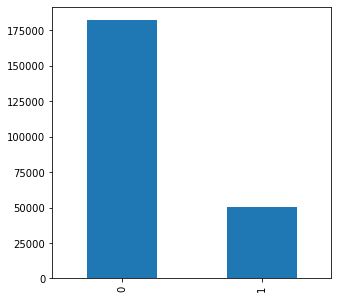

In [70]:
data["loan_default"].value_counts().plot.bar()

The number of loan defaulters is lesser than the number of loanees with no loan default

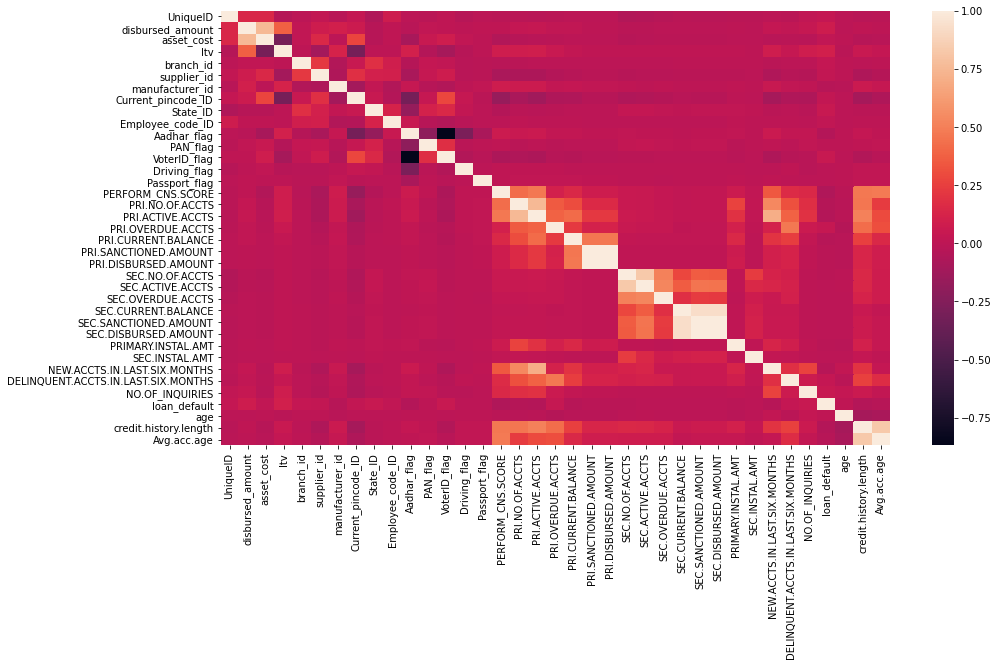

In [30]:
plt.figure(figsize=(15,8))
numdf1=numdf.drop("MobileNo_Avl_Flag",axis=1)
sns.heatmap(numdf1.corr())
plt.rcParams["figure.figsize"] = [10,10]

Here we can observe that there is an high correlation between AVERAGE.ACCT.AGE(Average loan tenure) 
and CREDIT.HISTORY.LENGTH(Time since first loan),sanctioned amounts and disbursed amounts,
active accounts and overdue accounts and also between Disbursed Amount and the Cost of the Asset which is obvious
since amount disbursed will surely be dependent on the cost of the asset.


In [31]:
data.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default', 'age', 'credit.history.length', 'Avg.acc.age'],
      dtype='object')

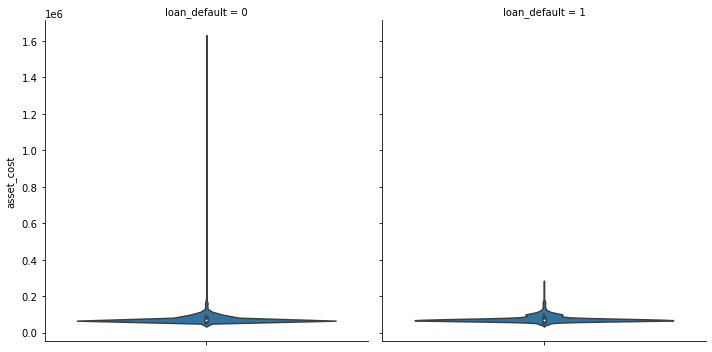

In [32]:
sns.catplot(data=data,col="loan_default",y='asset_cost',kind="violin")

In [33]:
data["asset_cost"].describe()

count    2.331540e+05
mean     7.586507e+04
std      1.894478e+04
min      3.700000e+04
25%      6.571700e+04
50%      7.094600e+04
75%      7.920175e+04
max      1.628992e+06
Name: asset_cost, dtype: float64

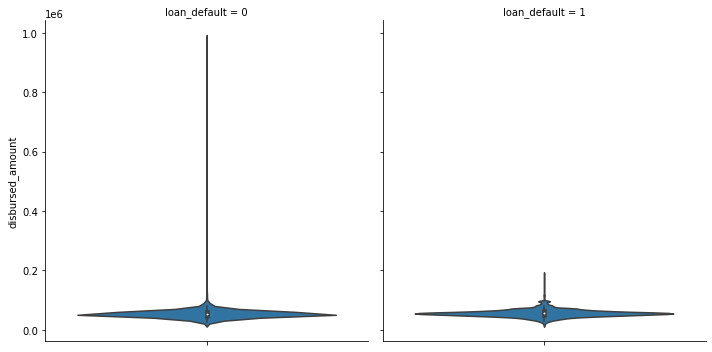

In [34]:
sns.catplot(data=data,col="loan_default",y='disbursed_amount',kind="violin")

In [35]:
data['disbursed_amount'].describe()

count    233154.000000
mean      54356.993528
std       12971.314171
min       13320.000000
25%       47145.000000
50%       53803.000000
75%       60413.000000
max      990572.000000
Name: disbursed_amount, dtype: float64

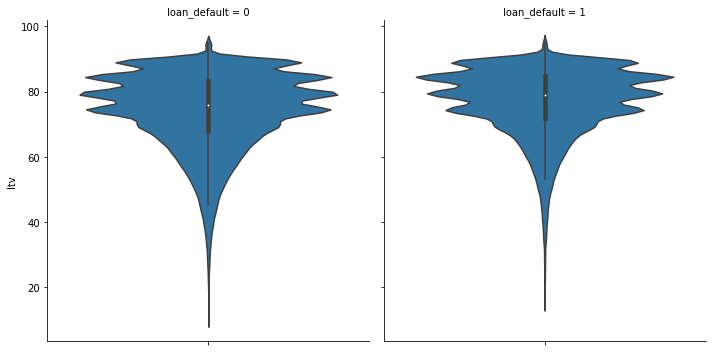

In [36]:
sns.catplot(data=data,col="loan_default",y='ltv',kind="violin")

In [37]:
data['ltv'].describe()

count    233154.000000
mean         74.746530
std          11.456636
min          10.030000
25%          68.880000
50%          76.800000
75%          83.670000
max          95.000000
Name: ltv, dtype: float64

Here we can observe that,asset cost and disbursed amount have outliers and a high maximum value when compared with rest of the values in that column and this high value is observed for the "no default" case,so,this may affect the average values significantly

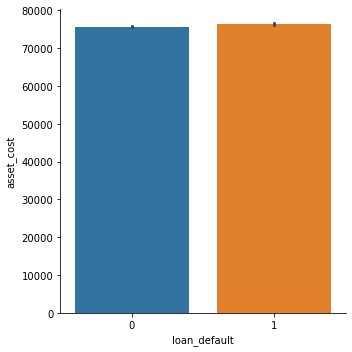

In [38]:
sns.catplot(data=data,x='loan_default',y='asset_cost',kind="bar")

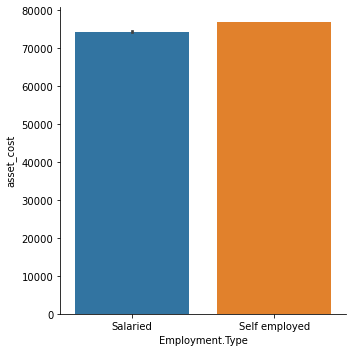

In [39]:
sns.catplot(data=data,x='Employment.Type',y='asset_cost',kind="bar")

Here,we can observe that Self Employed Loanees have more Average Asset Cost than Salaried Loanees
and the asset cost in "default" and "no default" case is quiet close to each other this can be due the high maximum
value case mentioned previously

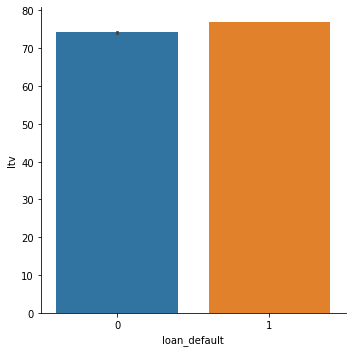

In [40]:
sns.catplot(data=data,x='loan_default',y='ltv',kind="bar")

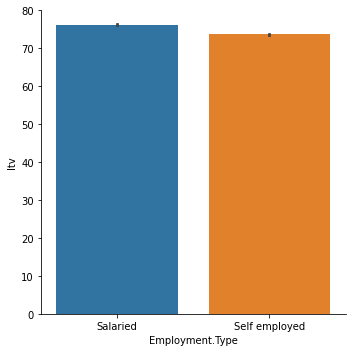

In [41]:
sns.catplot(data=data,x='Employment.Type',y='ltv',kind="bar")

Here we can observe that,the average Loan to Value of the asset is higher in case of salaried loanees than self employed and 
also the the average Loan to Value of the asset is lesser in the "no default" case than in the "default" case

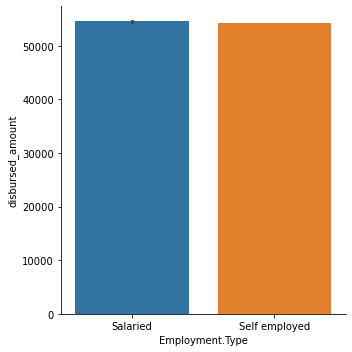

In [42]:
sns.catplot(data=data,x='Employment.Type',y='disbursed_amount',kind="bar")

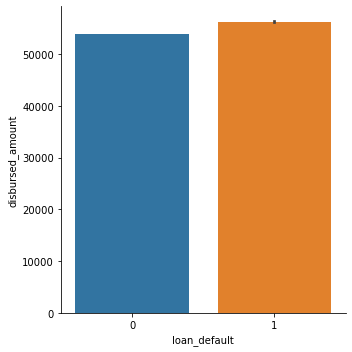

In [43]:
sns.catplot(data=data,x="loan_default",y='disbursed_amount',kind="bar")

The average disbursed amount in "default" and "no default" case is quiet close to each other but "default" case is having
a slight higher value and for the the employment type the disbursed amount is almost same for both the cases this 
can be due the high maximumvvalue case mentioned previously.

### NOTE
- Primary accounts are those which the customer has taken for his personal use.
- Secondary accounts are those which the customer act as a co-applicant or gaurantor



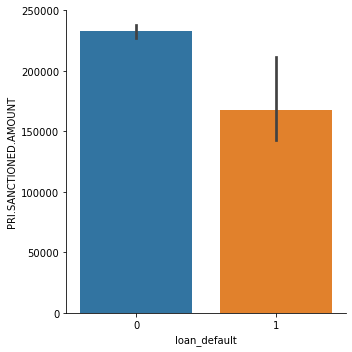

In [44]:
sns.catplot(data=data,x="loan_default",y='PRI.SANCTIONED.AMOUNT',kind="bar")

The average initially sanctioned amount(total amount that was sanctioned for all the loans at the time of disbursement)
for primary account in "no default" case is higher than the "default" case which means that bank trusted in their repaying capacity and sanctioned
them more amount.

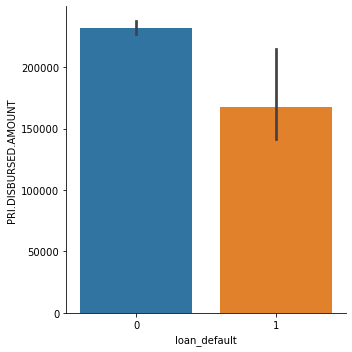

In [45]:
sns.catplot(data=data,x="loan_default",y='PRI.DISBURSED.AMOUNT',kind="bar")

The average initially disbursed amount(total amount that was disbursed for all the loans at the time of disbursement)
for primary account in "no default" case is higher than the "default" case.This conclusion can be stregthened by the previous
observation about initially sanctioned amount.

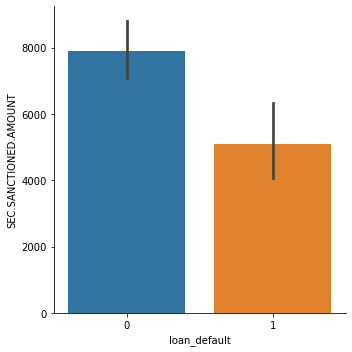

In [46]:
sns.catplot(data=data,x="loan_default",y='SEC.SANCTIONED.AMOUNT',kind="bar")

The average initially sanctioned amount(total amount that was sanctioned for all the loans at the time of disbursement) 
for secondary account in "no default" case is higher than the "default" case which means that bank trusted
in their repaying capacity and sanctioned them more amount and similar would be the case of average initially disbursed amount 
for secondary accounts

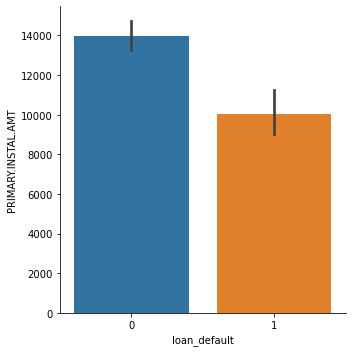

In [47]:
sns.catplot(data=data,x="loan_default",y='PRIMARY.INSTAL.AMT',kind="bar")

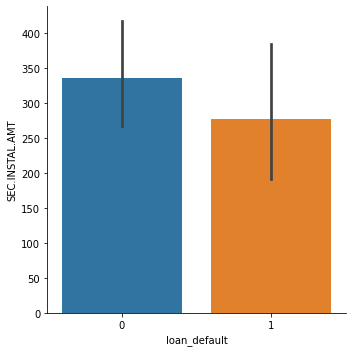

In [48]:
sns.catplot(data=data,x="loan_default",y='SEC.INSTAL.AMT',kind="bar")

The Average EMI Amount of the primary loan and EMI Amount of the secondary loan is higher in "no default" case than the "default" case

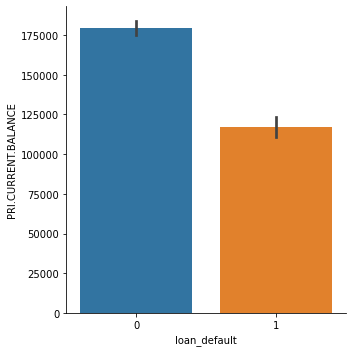

In [63]:
sns.catplot(data=data,x="loan_default",y='PRI.CURRENT.BALANCE',kind="bar")

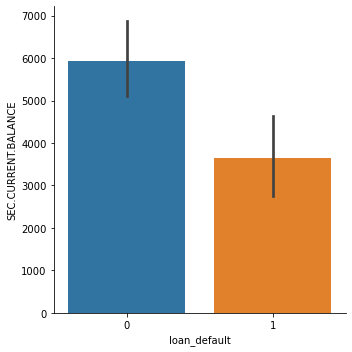

In [64]:
sns.catplot(data=data,x="loan_default",y='SEC.CURRENT.BALANCE',kind="bar")

The average Total Principal outstanding amount of the active loans at the time of disbursement for primary and secondary account
is shown above,in both the cases "no default" case has a higher value.


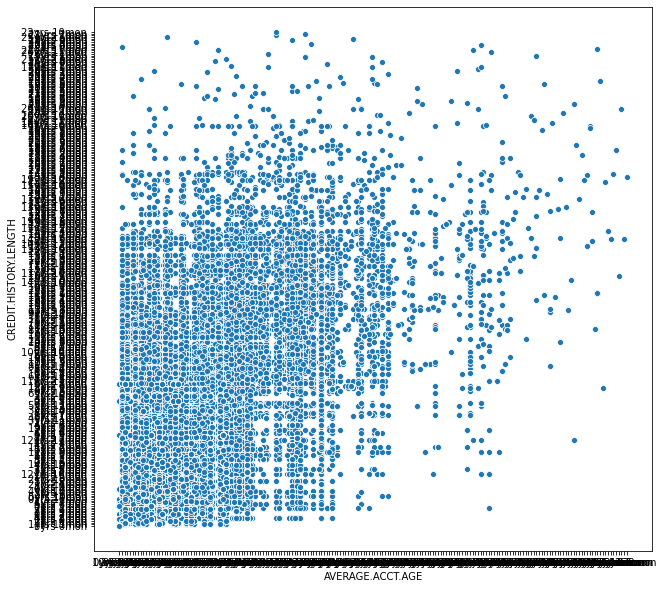

In [49]:
sns.scatterplot(data=data,x="AVERAGE.ACCT.AGE",y="CREDIT.HISTORY.LENGTH")

Both these variables(Average Account Age and Credit History Length) shows an high correlation because most of the loanees try to close their loan before 
the loan tenure gets over and this may happen maybe 1-2 months before the end of the tenure.

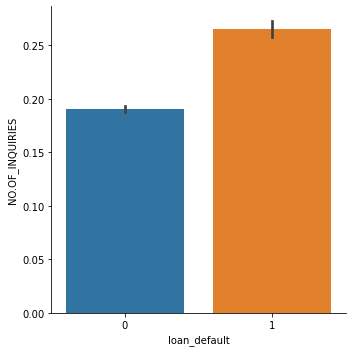

In [50]:
sns.catplot(data=data,x="loan_default",y='NO.OF_INQUIRIES',kind="bar")

Here,we can see that more number of enquiries where done by loan defaulters than others, a reason for this can be the firms they
approached didn't provide them loan doubting their repaying capacity and this made them enquire about loans multiple times.

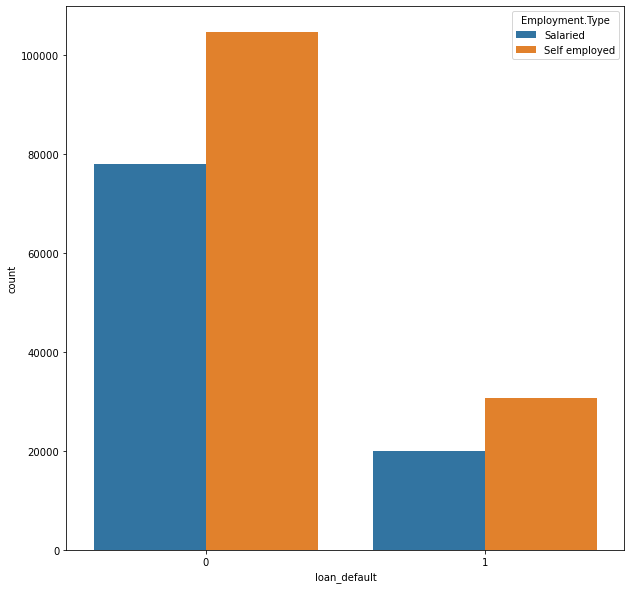

In [51]:
sns.countplot(data=data,x="loan_default",hue="Employment.Type")

Self Employed Loanees is more in both the cases this is because they has a higher chance of requirement of a vehicle maybe
to carry out various business activities

In [52]:
data["NEW.ACCTS.IN.LAST.SIX.MONTHS"]=data["NEW.ACCTS.IN.LAST.SIX.MONTHS"].astype(str)

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


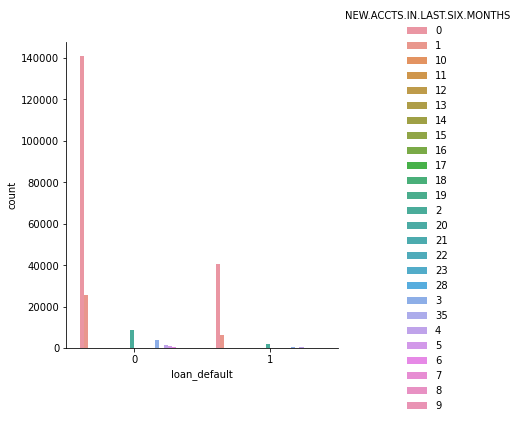

In [53]:
sns.factorplot(data=data,x="loan_default",hue="NEW.ACCTS.IN.LAST.SIX.MONTHS",kind="count")

For both "default" and "no default" class in most cases,there is no New loans taken by the customer in last 6 months before the disbursment 

In [54]:
data["PERFORM_CNS.SCORE.DESCRIPTION"]

0         No Bureau History Available
1                       I-Medium Risk
2         No Bureau History Available
3                    L-Very High Risk
4         No Bureau History Available
                     ...             
233149                D-Very Low Risk
233150                A-Very Low Risk
233151    No Bureau History Available
233152    No Bureau History Available
233153    No Bureau History Available
Name: PERFORM_CNS.SCORE.DESCRIPTION, Length: 233154, dtype: object

In [55]:
data["PERFORM_CNS.SCORE.DESCRIPTION"].unique()

array(['No Bureau History Available', 'I-Medium Risk', 'L-Very High Risk',
       'A-Very Low Risk',
       'Not Scored: Not Enough Info available on the customer',
       'D-Very Low Risk', 'M-Very High Risk', 'B-Very Low Risk',
       'C-Very Low Risk', 'E-Low Risk', 'H-Medium Risk', 'F-Low Risk',
       'K-High Risk',
       'Not Scored: No Activity seen on the customer (Inactive)',
       'Not Scored: Sufficient History Not Available',
       'Not Scored: No Updates available in last 36 months', 'G-Low Risk',
       'J-High Risk', 'Not Scored: Only a Guarantor',
       'Not Scored: More than 50 active Accounts found'], dtype=object)

In [56]:
data["PERFORM_CNS.SCORE"]

0           0
1         598
2           0
3         305
4           0
         ... 
233149    735
233150    825
233151      0
233152      0
233153      0
Name: PERFORM_CNS.SCORE, Length: 233154, dtype: int64

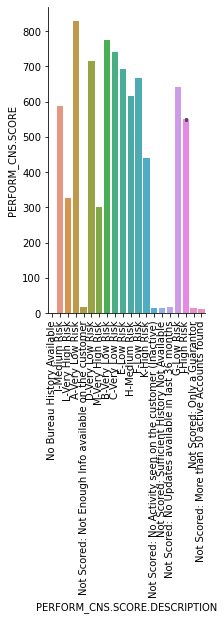

In [57]:
sns.catplot(data=data,x="PERFORM_CNS.SCORE.DESCRIPTION",y='PERFORM_CNS.SCORE',kind="bar")
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = [10,10]

The highest perform cns score is observed for very low risk loans,from this we can conclude that Perform CNS Score and Risk
Factor are inversely proportional

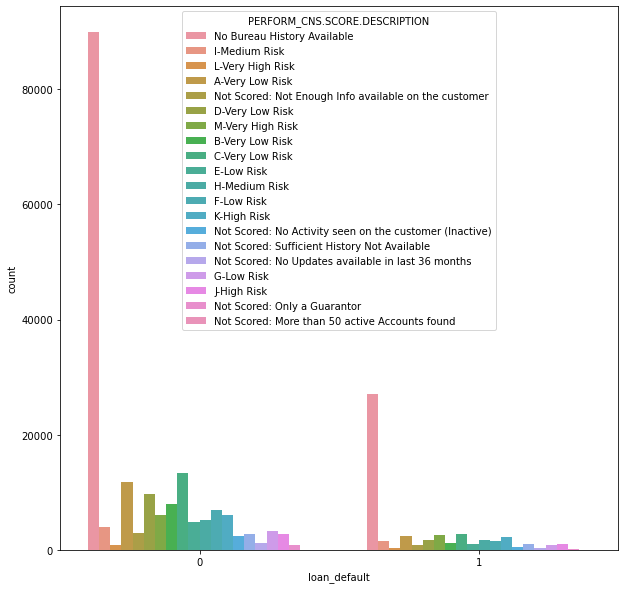

In [58]:
sns.countplot(data=data,x="loan_default",hue="PERFORM_CNS.SCORE.DESCRIPTION")

Here we can observe that for a significantly high number of cases there is no bureau history available

In [59]:
data_default=data[data["loan_default"]==1]
data_no_default=data[data["loan_default"]==0]

DEFAULT CASE ACCOUNTS SUMMARY

In [60]:
acc_list=["SEC.NO.OF.ACCTS","SEC.ACTIVE.ACCTS","SEC.OVERDUE.ACCTS","PRI.NO.OF.ACCTS","PRI.ACTIVE.ACCTS","PRI.OVERDUE.ACCTS"]
data_acc=data_default[acc_list]
data_acc.describe()

,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS
count,50611.000000,50611.000000,50611.000000,50611.000000,50611.000000,50611.000000
mean,0.049100,0.024105,0.006955,2.089328,0.887060,0.199146
std,0.527358,0.288096,0.110463,5.040134,1.669966,0.603484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000
max,38.000000,22.000000,6.000000,453.000000,35.000000,18.000000


NO DEFAULT CASE ACCOUNTS SUMMARY

In [61]:
acc_list=["SEC.NO.OF.ACCTS","SEC.ACTIVE.ACCTS","SEC.OVERDUE.ACCTS","PRI.NO.OF.ACCTS","PRI.ACTIVE.ACCTS","PRI.OVERDUE.ACCTS"]
data_acc=data_no_default[acc_list]
data_acc.describe()

,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS
count,182543.000000,182543.000000,182543.000000,182543.000000,182543.000000,182543.000000
mean,0.061848,0.028700,0.007324,2.538038,1.082271,0.144738
std,0.651657,0.323375,0.111249,5.261142,2.008242,0.532026
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000
max,52.000000,36.000000,8.000000,354.000000,144.000000,25.000000


Here we can see that,for the "no default" case 
- Number of  total loans taken by the customer at the time of disbursement
- Number of active loans taken by the customer at the time of disbursement
- Number of default accounts at the time of disbursement

for both primary and secondary case is higher than the "default" case 
and adding to it,the maximum value for all these accounts are also observed in "no default" case.



In [62]:
data["DisbursalDate"].dt.month.value_counts()

10    84875
8     56975
9     54443
11     6709
6      5991
12     5613
3      5148
4      4627
7      4150
5      2890
1      1708
2        25
Name: DisbursalDate, dtype: int64

Here we can observe that,the maximum loan disbursal took place during the year ending months and they are festival seasons.